# Modeling

In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '2'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score
from scipy.stats import ttest_ind
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:
path = os.path.join("FINAL_no_TR.xlsx")

# Read the Excel file
FINAL_no_TR = pd.read_excel(path)

# Display the first few rows
FINAL_no_TR

,year,nuts3_name,country,questioncount,answercount,upvotecount,downvotecount,commentcount,nuts3_code,EMP (THS),GDP (MIO_EUR),GVA (MIO_EUR),POP (THS)
0,2008,Aargau,CH,86,167,0,0,32,CH033,349.067,24942.455371,23931.324019,586.60
1,2009,Aargau,CH,370,2291,4158,265,3282,CH033,349.067,25582.147076,24614.963819,595.84
2,2010,Aargau,CH,1658,4073,12602,474,7459,CH033,349.067,28422.113810,27311.621095,604.17
3,2011,Aargau,CH,1876,6039,16410,2362,13563,CH033,348.695,32557.042431,31336.257699,614.88
4,2012,Aargau,CH,3226,6260,24401,4175,18513,CH033,355.344,33443.246005,32261.320850,622.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3947,2016,Östergötland County,SE,4512,3147,18061,1583,14559,SE123,212.000,18408.070000,16305.800000,449.00
3948,2017,Östergötland County,SE,3633,3263,16235,1506,11172,SE123,217.000,18787.460000,16657.120000,454.99
3949,2018,Östergötland County,SE,3683,2516,19716,1875,14176,SE123,224.000,18855.660000,16710.180000,460.01
3950,2019,Östergötland County,SE,2957,2037,19970,1243,9206,SE123,226.000,18820.580000,16714.730000,464.00


### Outliers?

In [3]:
df=FINAL_no_TR

# Aggregate numeric data by 'nuts3_code' and compute the mean
aggregated_numeric_data = df.groupby('nuts3_code').mean().reset_index()

# Select non-aggregated columns and remove duplicates
non_aggregated_data = df[['nuts3_code', 'country', 'nuts3_name']].drop_duplicates()

# Merge aggregated and non-aggregated data on 'nuts3_code'
aggregated_data = pd.merge(non_aggregated_data, aggregated_numeric_data, on='nuts3_code', how='left')

# Reorder columns to bring 'country', 'nuts3_name', and 'nuts3_code' to the front
column_order = ['country', 'nuts3_name', 'nuts3_code'] + \
               [col for col in aggregated_numeric_data.columns if col not in ['country', 'nuts3_name', 'nuts3_code']]
aggregated_data = aggregated_data[column_order]

# Display the aggregated data
aggregated_data


,country,nuts3_name,nuts3_code,year,questioncount,answercount,upvotecount,downvotecount,commentcount,EMP (THS),GDP (MIO_EUR),GVA (MIO_EUR),POP (THS)
0,CH,Aargau,CH033,2014.0,2591.076923,4168.692308,19718.307692,2633.076923,11534.692308,365.573615,34462.899681,33334.040620,639.911538
1,IT,Agrigento,ITG14,2014.0,129.153846,52.153846,290.384615,14.923077,245.923077,124.653846,6526.408462,5869.846154,441.746154
2,FR,Ain,FRK21,2014.0,614.923077,1210.461538,4728.769231,636.230769,3430.230769,213.926154,15576.303846,13933.794615,627.548462
3,FR,Aisne,FRE21,2014.0,304.923077,413.153846,1631.384615,247.307692,1006.153846,171.609231,11770.216923,10530.764615,537.897692
4,ES,Albacete,ES421,2014.0,323.923077,299.769231,1419.692308,69.000000,841.000000,142.961538,7491.142308,6849.592308,394.915385
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,CH,Zug,CH066,2014.0,903.461538,1888.461538,10086.000000,4004.000000,8334.923077,67.876538,15419.896276,14793.478214,119.136154
300,CH,Zürich,CH040,2014.0,19301.923077,29871.307692,152707.000000,21257.846154,93904.230769,829.334231,119472.405940,115346.430573,1436.717692
301,ES,Ávila,ES411,2014.0,111.461538,111.692308,886.153846,47.000000,295.307692,57.776923,3112.813846,2847.007692,166.215385
302,SE,Örebro County,SE124,2014.0,1632.538462,2284.153846,6378.692308,607.384615,6036.538462,136.000000,10987.737692,9741.518462,289.156154


Outliers are defined as observations in the data that differ from the general tendency in the rest of the data. It is necessary to identify and understand them in order to determine if such points are the result of poor data or simply they represent real situations that are worthy of analyzing and interpreting.

In [4]:
def process_data(df, weights):
    # Calculate 'activity' based on the provided weights
    df['activity'] = (df['questioncount'] * weights['questions'] +
                      df['answercount'] * weights['answers'] +
                      df['commentcount'] * weights['comments'] +
                      df['upvotecount'] * weights['upvotes'] +
                      df['downvotecount'] * weights['downvotes'])

    # Aggregate data by nuts3_code
    aggregated_numeric_data = df.groupby('nuts3_code').mean().reset_index()

    # Select non-aggregated columns
    non_aggregated_data = df[['nuts3_code', 'country', 'nuts3_name']].drop_duplicates()

    # Merge aggregated and non-aggregated data
    aggregated_data = pd.merge(non_aggregated_data, aggregated_numeric_data, on='nuts3_code', how='left')

    # Reorder columns
    column_order = ['country', 'nuts3_name', 'nuts3_code'] + [col for col in aggregated_data.columns if col not in ['country', 'nuts3_name', 'nuts3_code']]
    aggregated_data = aggregated_data[column_order]

    return aggregated_data

#Define different sets of weights
weights_set1 = {'questions': 0.4, 'answers': 0.4, 'comments': 0.1, 'upvotes': 0.05, 'downvotes': 0.05}
weights_set2 = {'questions': 0.3, 'answers': 0.5, 'comments': 0.1, 'upvotes': 0.05, 'downvotes': 0.05}


# Process data with different sets of weights
processed_data_set1 = process_data(FINAL_no_TR.copy(), weights_set1)
processed_data_set2 = process_data(FINAL_no_TR.copy(), weights_set2)

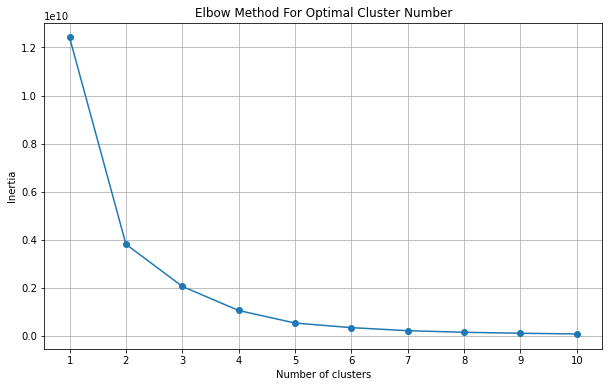

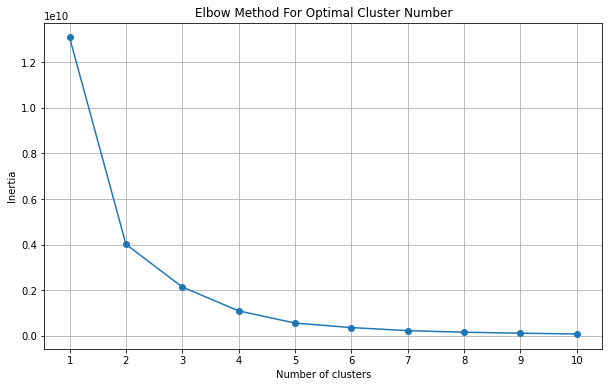

In [5]:
def determine_optimal_clusters(data, max_clusters=10):
    cluster_range = range(1, max_clusters + 1)
    inertia_values = []

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(data[['activity']])
        inertia_values.append(kmeans.inertia_)

    # Plotting the Elbow Method graph
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, inertia_values, marker='o')
    plt.title('Elbow Method For Optimal Cluster Number')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.xticks(cluster_range)
    plt.grid(True)
    plt.show()

# Now call this function for each processed dataset
determine_optimal_clusters(processed_data_set1)
determine_optimal_clusters(processed_data_set2)

The elbow method is used to determine the appropiate number of clusters in a dataset. The elbow point is represented by  the point in a curve hwhere the rate decreases substantially in inertia. In our dataset, this is observed at the number of three clusters, which indicates that beyond this number, there wont be significant improvements in its fit.

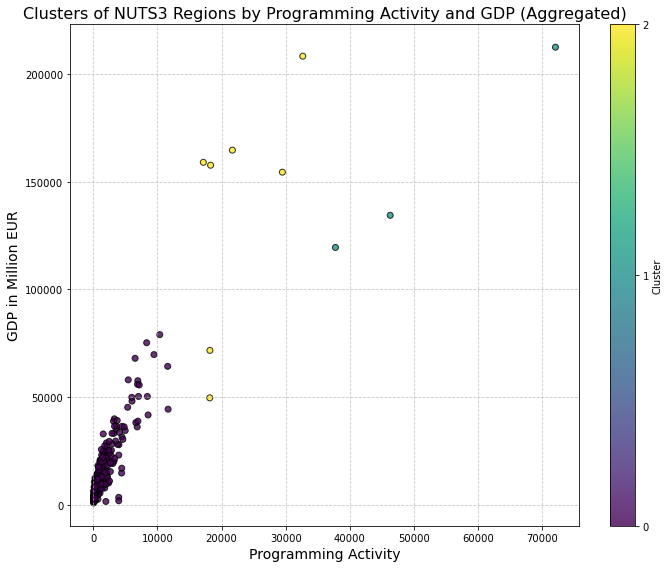

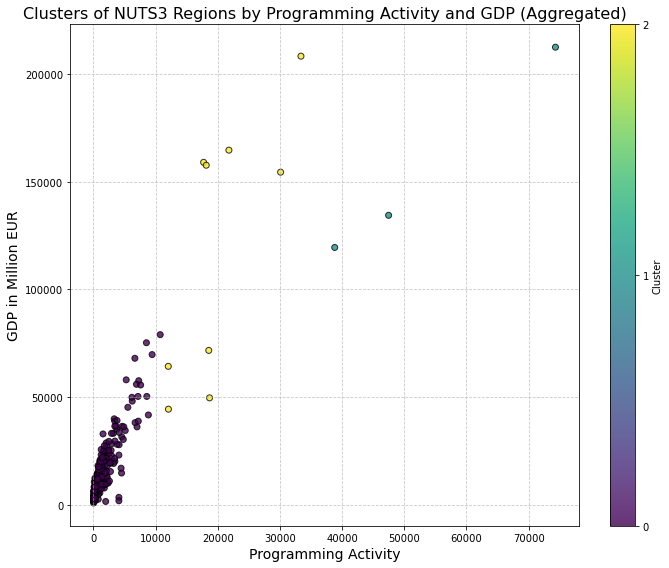

In [6]:
#Plotting clusters vs GDP

def cluster_and_plot(data, optimal_clusters=3):
    # Apply K-Means Clustering
    kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data[['activity']])

    # Plotting
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(data['activity'], data['GDP (MIO_EUR)'],
                          c=data['Cluster'], cmap='viridis', alpha=0.8, edgecolor='k')
    
    # Create a color bar with discrete labels
    cbar = plt.colorbar(scatter, ticks=np.arange(0, optimal_clusters))
    cbar.set_label('Cluster')

    # Add grid, labels, and title
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlabel('Programming Activity', fontsize=14)
    plt.ylabel('GDP in Million EUR', fontsize=14)
    plt.title('Clusters of NUTS3 Regions by Programming Activity and GDP (Aggregated)', fontsize=16)
    plt.tight_layout()
    plt.show()

# Now call this function for each processed dataset
cluster_and_plot(processed_data_set1)
cluster_and_plot(processed_data_set2)


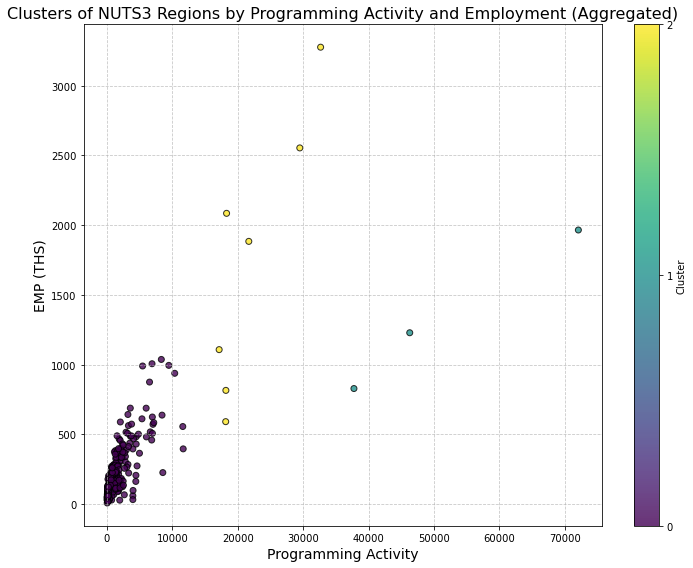

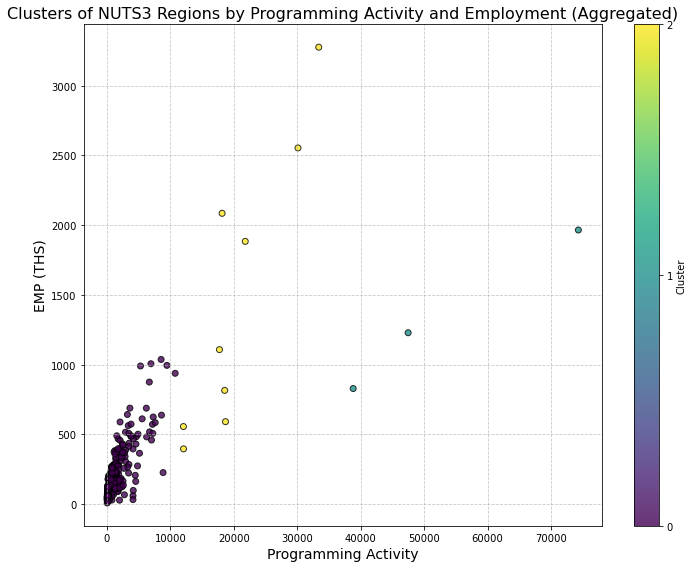

In [7]:
#Plotting clusters vs Employment

def cluster_and_plot(data, optimal_clusters=3):
    # Apply K-Means Clustering
    kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data[['activity']])

    # Plotting
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(data['activity'], data['EMP (THS)'],
                          c=data['Cluster'], cmap='viridis', alpha=0.8, edgecolor='k')
    
    # Create a color bar with discrete labels
    cbar = plt.colorbar(scatter, ticks=np.arange(0, optimal_clusters))
    cbar.set_label('Cluster')

    # Add grid, labels, and title
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlabel('Programming Activity', fontsize=14)
    plt.ylabel('EMP (THS)', fontsize=14)
    plt.title('Clusters of NUTS3 Regions by Programming Activity and Employment (Aggregated)', fontsize=16)
    plt.tight_layout()
    plt.show()

# Now call this function for each processed dataset
cluster_and_plot(processed_data_set1)
cluster_and_plot(processed_data_set2)
# Repeat for other datasets


Creating a single metric to measure programming activity on Stack Overflow using Questions, Answers, Comments, Upvotes, and Downvotes involves deciding on the relative importance (weight) of each component. Here's a suggested weighting scheme along with justifications:

Questions (30%):

Posting questions is a fundamental activity that drives the platform. It indicates the need for knowledge and a region's engagement with technical problems. However, the mere act of asking doesn't demonstrate expertise or community engagement to the same extent as answering.
Answers (40%):

Providing answers is arguably the most valuable contribution in a knowledge-sharing platform. It indicates not only engagement but also the expertise present in a region. A higher weight is assigned here to reflect the value of knowledge dissemination.
Comments (10%):

Comments are essential for clarifying questions and answers, but they don't always directly contribute to solving problems. They are more about engagement than expertise, hence a lower weight.
Upvotes (10%):

Upvotes are a measure of community approval and indicate the quality and usefulness of questions, answers, and comments. They reflect peer recognition, which is a key aspect of community-driven platforms.
Downvotes (10%):

Downvotes are also an important feedback mechanism, indicating the quality of content. However, they should be weighted equally with upvotes to balance positive and negative feedback.
This weighting scheme prioritizes content creation (questions and answers) as the core of programming activity, with a higher emphasis on answers due to their direct contribution to knowledge sharing. Comments, upvotes, and downvotes are given lower weights as they are secondary forms of engagement compared to the creation of questions and answers.

Remember, the best weighting scheme depends on your specific research objectives and the hypotheses you are testing. The proposed weights are based on a general understanding of the value of different types of engagement on platforms like Stack Overflow. You should adjust these weights if your research or data analysis suggests different priorities or if you have domain-specific insights that would lead to a different assessment of the importance of each activity type.

In [8]:
# Assign weights
weights = {'questions': 0.3, 'answers': 0.4, 'comments': 0.1, 'upvotes': 0.1, 'downvotes': 0.1}

FINAL_no_TR['activity'] = (FINAL_no_TR['questioncount']*weights['questions'] + 
                          FINAL_no_TR['answercount']*weights['answers'] + 
                          FINAL_no_TR['commentcount']*weights['comments'] + 
                          FINAL_no_TR['upvotecount']*weights['upvotes'] + 
                          FINAL_no_TR['downvotecount']*weights['downvotes'])

# Multivariate Clustering

In [9]:
# Select relevant columns for clustering
features = ['questioncount', 'answercount', 'upvotecount', 'downvotecount', 'commentcount']
X = aggregated_data[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

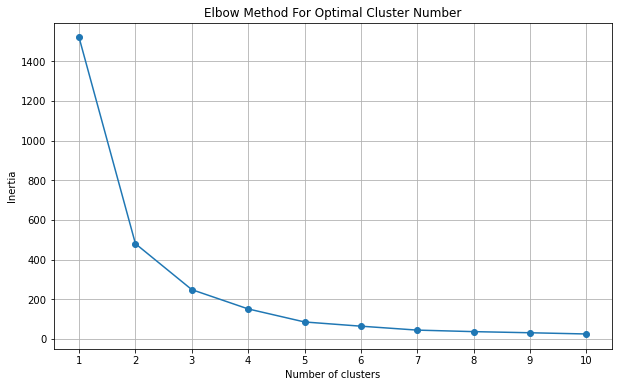

In [10]:
# Determine the optimal number of clusters using the Elbow Method
def determine_optimal_clusters(data, max_clusters=10):
    cluster_range = range(1, max_clusters + 1)
    inertia_values = []

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(data)
        inertia_values.append(kmeans.inertia_)

    # Plotting the Elbow Method graph
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, inertia_values, marker='o')
    plt.title('Elbow Method For Optimal Cluster Number')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.xticks(cluster_range)
    plt.grid(True)
    plt.show()

# Call the function with scaled data
determine_optimal_clusters(X_scaled)


In [11]:
optimal_clusters = 3  

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
aggregated_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the first few rows of the dataframe to show the cluster assignments
aggregated_data.head()


,country,nuts3_name,nuts3_code,year,questioncount,answercount,upvotecount,downvotecount,commentcount,EMP (THS),GDP (MIO_EUR),GVA (MIO_EUR),POP (THS),Cluster
0,CH,Aargau,CH033,2014.0,2591.076923,4168.692308,19718.307692,2633.076923,11534.692308,365.573615,34462.899681,33334.040620,639.911538,0
1,IT,Agrigento,ITG14,2014.0,129.153846,52.153846,290.384615,14.923077,245.923077,124.653846,6526.408462,5869.846154,441.746154,0
2,FR,Ain,FRK21,2014.0,614.923077,1210.461538,4728.769231,636.230769,3430.230769,213.926154,15576.303846,13933.794615,627.548462,0
3,FR,Aisne,FRE21,2014.0,304.923077,413.153846,1631.384615,247.307692,1006.153846,171.609231,11770.216923,10530.764615,537.897692,0
4,ES,Albacete,ES421,2014.0,323.923077,299.769231,1419.692308,69.000000,841.000000,142.961538,7491.142308,6849.592308,394.915385,0


In [12]:
# Evaluate the clusters
from sklearn.metrics import silhouette_score

# The silhouette score gives an indication of the quality of the clusters
silhouette_avg = silhouette_score(X_scaled, aggregated_data['Cluster'])
print('Silhouette Score:', silhouette_avg)

# To interpret the clusters, you might look at the centroids or the distribution of features within each cluster
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print(cluster_centers)


Silhouette Score: 0.8772404300306705
   questioncount   answercount    upvotecount  downvotecount   commentcount
0     866.832192   1188.520548    4880.966544     554.435722    3666.265543
1   27505.692308  42492.974359  192240.948718   24409.487179  132041.641026
2   11576.017094  15694.350427   70512.025641    9361.760684   49710.162393


In [13]:
from sklearn.decomposition import PCA

# Perform PCA on the scaled data
pca = PCA(n_components=1)
principal_component = pca.fit_transform(X_scaled)
aggregated_data['PC1'] = principal_component[:, 0]


Cluster 0:

This cluster represents regions with relatively low programming activity across all features (questions, answers, upvotes, downvotes, comments). These could be regions with smaller or less active tech communities.
Cluster 1:

This is clearly the cluster with the highest programming activity. The regions in this cluster are highly active, with a lot of questions, answers, and other interactions. This could represent tech hubs or areas with a very high concentration of tech industry and community engagement.
Cluster 2:

The regions in this cluster have moderate levels of activity, significantly less than Cluster 1 but higher than Cluster 0. This might represent regions with growing tech communities or a balanced presence of technology professionals.
To further analyze these clusters, you could:

Examine the geographical distribution of these clusters to see if they correspond to known tech hubs or economically active areas.
Look into the temporal changes, if you have data over multiple years, to see how the clusters evolve over time.
Cross-reference with additional socioeconomic data to understand the factors contributing to the level of programming activity.

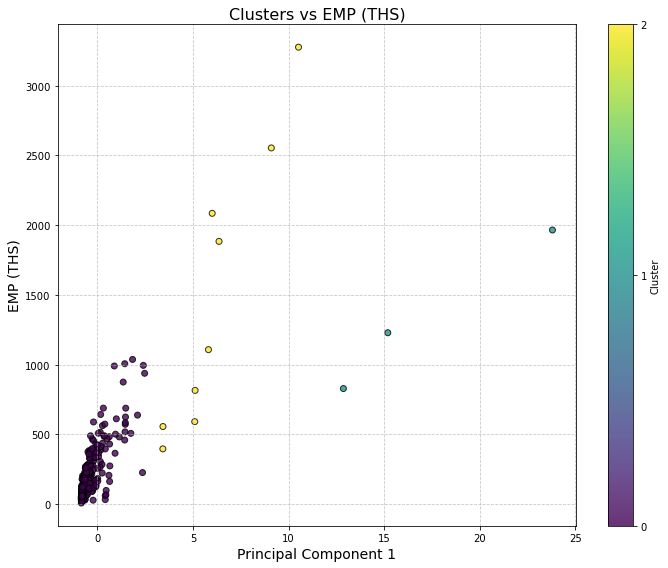

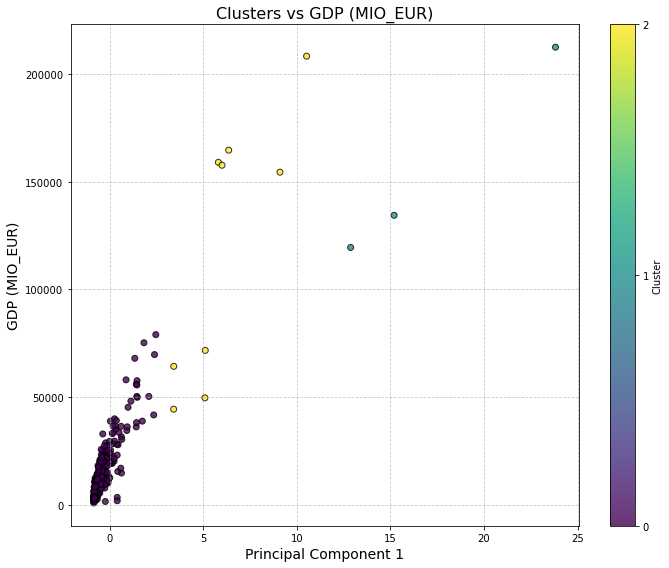

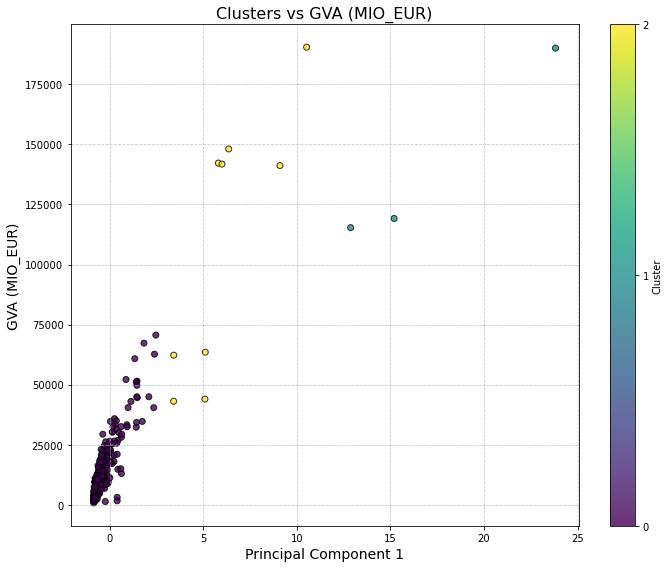

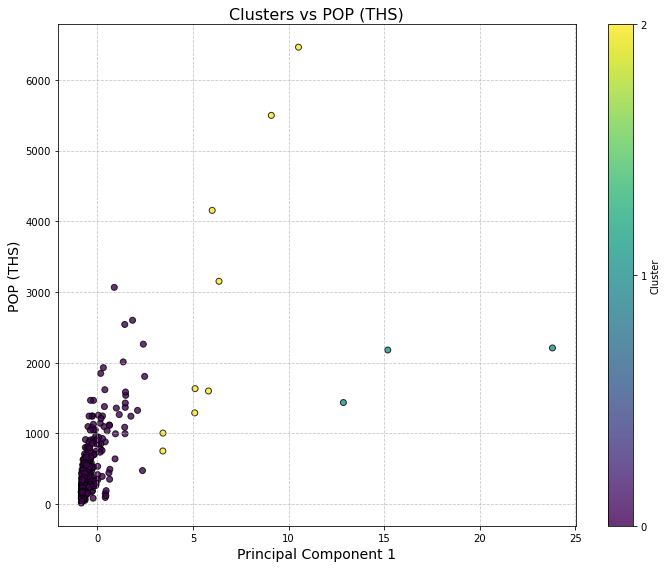

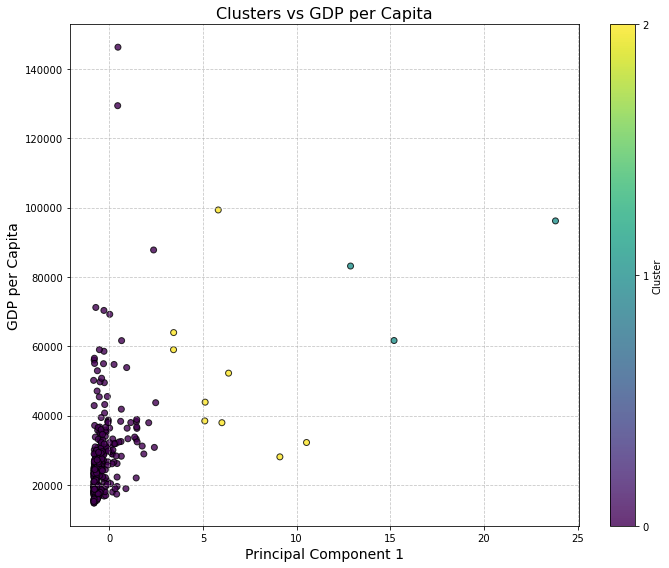

In [14]:
# Calculate GDP per Capita
aggregated_data['GDP per Capita'] = (aggregated_data['GDP (MIO_EUR)'] * 1e6) / (aggregated_data['POP (THS)'] * 1e3)

# Update the list of economic measures
economic_measures = ['EMP (THS)', 'GDP (MIO_EUR)', 'GVA (MIO_EUR)', 'POP (THS)', 'GDP per Capita']

# Create scatter plots for each economic measure
for measure in economic_measures:
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(aggregated_data['PC1'], aggregated_data[measure],
                          c=aggregated_data['Cluster'], cmap='viridis', alpha=0.8, edgecolor='k')

    # Create a color bar with discrete labels
    cbar = plt.colorbar(scatter, ticks=np.arange(0, optimal_clusters))
    cbar.set_label('Cluster')

    # Add grid, labels, and title
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlabel('Principal Component 1', fontsize=14)
    plt.ylabel(measure, fontsize=14)
    plt.title(f'Clusters vs {measure}', fontsize=16)
    plt.tight_layout()
    plt.show()




**OUTLIERS IN GDP PER CAPITA**

In [20]:
aggregated_data['GDP per Capita'] = (aggregated_data['GDP (MIO_EUR)'] * 1e6) / (aggregated_data['POP (THS)'] * 1e3)

# Filter for Cluster 0 and 2, and 'GDP per Capita' greater than 8,000
clusters_0_and_2_high_gdp = aggregated_data[((aggregated_data['Cluster'] == 0) | 
                                             (aggregated_data['Cluster'] == 2)) & 
                                             (aggregated_data['GDP per Capita'] > 80000)]

# Display the filtered DataFrame
clusters_0_and_2_high_gdp

,country,nuts3_name,nuts3_code,year,questioncount,answercount,upvotecount,downvotecount,commentcount,EMP (THS),GDP (MIO_EUR),GVA (MIO_EUR),POP (THS),Cluster,PC1,GDP per Capita
36,CH,Basel-Stadt,CH031,2014.0,1900.384615,3453.923077,14721.076923,1347.307692,10469.000000,98.826692,27863.280356,26878.809343,190.442308,0,0.456998,146308.247856
99,CH,Genève,CH013,2014.0,3715.846154,6808.692308,34021.538462,5731.000000,23438.769231,226.932308,41691.012714,40451.113613,474.874615,0,2.360012,87793.727783
123,FR,Hauts-de-Seine,FR105,2014.0,8619.615385,14436.846154,57023.769231,13495.692308,44039.846154,1108.220769,159006.646154,142218.282308,1600.637692,2,5.811031,99339.561300
299,CH,Zug,CH066,2014.0,903.461538,1888.461538,10086.000000,4004.000000,8334.923077,67.876538,15419.896276,14793.478214,119.136154,0,0.442521,129430.871973


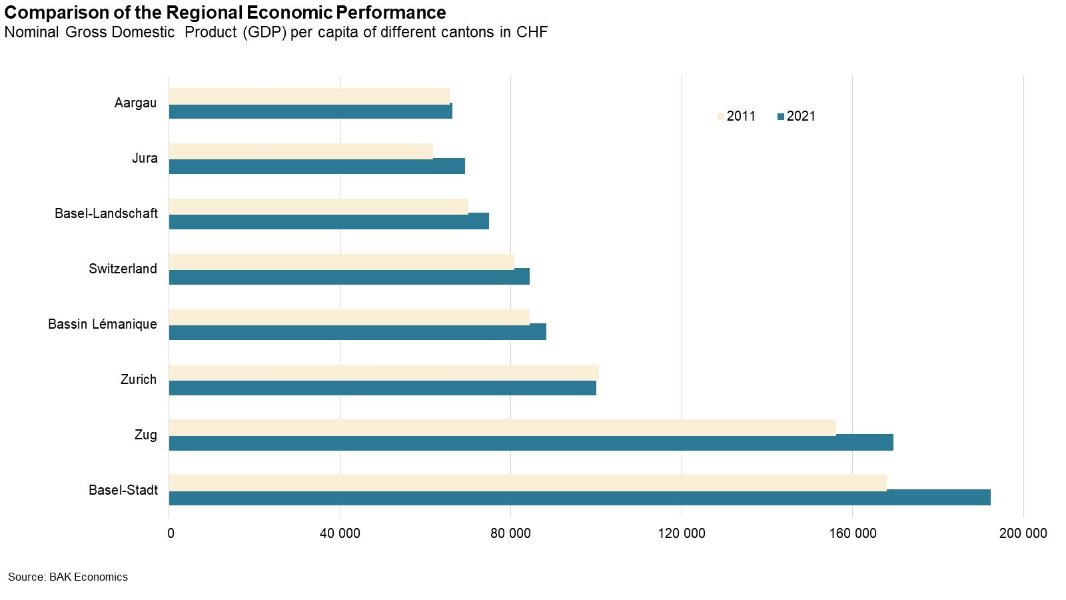

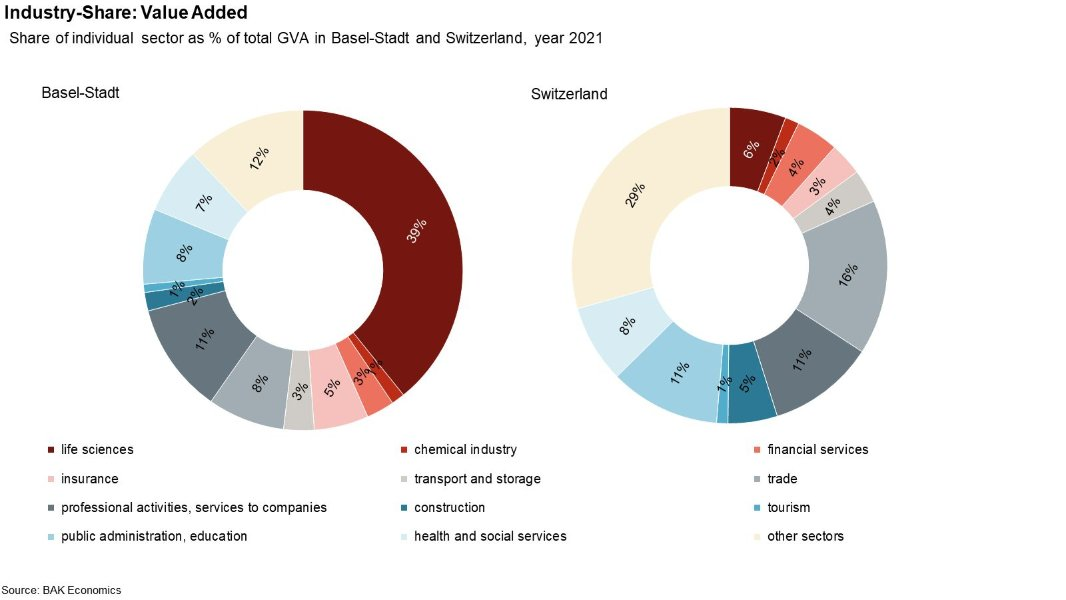

As observed,  In regions like Basel-Stadt, Genève, and Hauts-de-Seine, the high GDP per Capita is largely driven by industries other than technology or programming.

Compared to other tech-centric areas, these sectors might not rely as significantly on programming activities. Because programming may not be the main factor driving these regions' economic production, they may exhibit lower levels of programming activity despite their economic growth. This may cause them to be categorized, while having a high GDP per capita, in clusters with less programming activity.


In **Basel** the pharmaceutical sector is the main driver of the country's imports and exports. It's recognized for its innovation and production, particularly in life sciences. Rather than technology or programming, **Genève's** economy is mostly shaped by banking, finance, and high-value industries like life sciences. On the other hand **Zug** developed into a major hub for trade and finance on a national and worldwide scale, with a sizable number of business and industrial zones. Its closeness to Zürich and its appealing tax policy encouraged this transition. While **Hauts-de-Seine** Home to La Défense, a significant European commercial center, which helps to explain why it's one of the wealthiest departments in France.


In [22]:
# Filter for only Cluster 1
cluster_1_df = aggregated_data[aggregated_data['Cluster'] == 1]
cluster_1_df



,country,nuts3_name,nuts3_code,year,questioncount,answercount,upvotecount,downvotecount,commentcount,EMP (THS),GDP (MIO_EUR),GVA (MIO_EUR),POP (THS),Cluster,PC1,GDP per Capita
200,FR,Paris,FR101,2014.0,37762.615385,60242.230769,270904.230769,30471.923077,177931.230769,1965.718462,212477.678462,190051.500769,2209.104615,1,23.813364,96182.714473
249,SE,Stockholm County,SE110,2014.0,25452.538462,37365.384615,153111.615385,21498.692308,124289.461538,1229.307692,134405.519231,119165.333846,2179.706923,1,15.195474,61662.197705
300,CH,Zürich,CH040,2014.0,19301.923077,29871.307692,152707.000000,21257.846154,93904.230769,829.334231,119472.405940,115346.430573,1436.717692,1,12.873440,83156.493847
